In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import nltk # This line imports the nltk library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# 1. Load the dataset
df = pd.read_csv("/content/blogs.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Display basic info and value counts for labels
print("First few rows of the dataset:")
print(df.head())
print("\nCategory distribution:")
print(df['Labels'].value_counts())

First few rows of the dataset:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Category distribution:
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          10

In [4]:
# 2. Text Cleaning and Preprocessing Function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and apply stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)


In [7]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
# Apply cleaning
df['Cleaned_Data'] = df['Data'].apply(clean_text)

In [9]:
# 3. Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Data']).toarray()
y = df['Labels']

In [10]:
# 4. Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 5. Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [13]:
# 6. Predict and Evaluate the Model
from sklearn.metrics import accuracy_score # Import the accuracy_score function
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.84

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.80      0.89      0.84        18
 comp.os.ms-windows.misc       0.83      0.91      0.87        22
comp.sys.ibm.pc.hardware       0.83      0.80      0.82        25
   comp.sys.mac.hardware       0.77      0.81      0.79        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       1.00      0.67      0.80        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.88      0.94      0.91        16
      rec.sport.baseball       0.86      1.00      0.92        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.72      0.81      0.76        16
                 


Sentiment Distribution:
Sentiment
Neutral     1081
Positive     782
Negative     137
Name: count, dtype: int64

Sentiment Distribution by Category (in %):
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                    5.0     60.0      35.0
comp.graphics                 10.0     51.0      39.0
comp.os.ms-windows.misc        9.0     48.0      43.0
comp.sys.ibm.pc.hardware       6.0     49.0      45.0
comp.sys.mac.hardware          7.0     50.0      43.0
comp.windows.x                10.0     53.0      37.0
misc.forsale                   7.0     33.0      60.0
rec.autos                      7.0     48.0      45.0
rec.motorcycles                7.0     49.0      44.0
rec.sport.baseball             8.0     53.0      39.0
rec.sport.hockey              13.0     56.0      31.0
sci.crypt                      3.0     62.0      35.0
sci.electronics                4.0     56.0      40.0
sci.med                       11.0

<Figure size 1000x600 with 0 Axes>

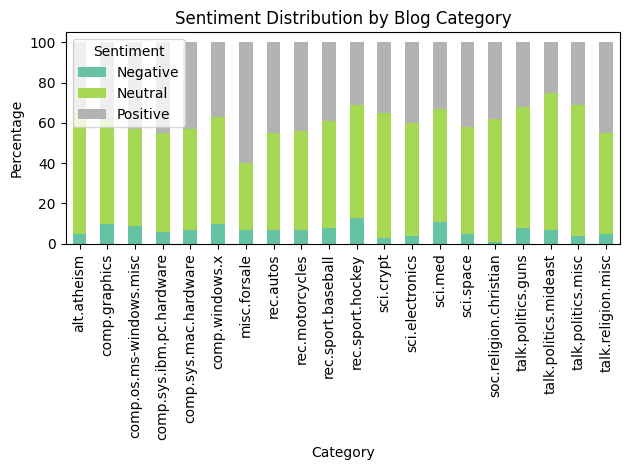

In [16]:
# 7. Sentiment Analysis using TextBlob
!pip install textblob # Install the textblob library
from textblob import TextBlob # Import the TextBlob class
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)

# Sentiment Distribution
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

# Sentiment by Category
sentiment_by_category = pd.crosstab(df['Labels'], df['Sentiment'], normalize='index') * 100
print("\nSentiment Distribution by Category (in %):")
print(sentiment_by_category)

# 8. Visualization of Sentiment Distribution
plt.figure(figsize=(10,6)) # Now plt is defined and can be used
sentiment_by_category.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Sentiment Distribution by Blog Category")
plt.ylabel("Percentage")
plt.xlabel("Category")
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()